<a href="https://colab.research.google.com/github/sydney-ho/Airbnb-Analysis/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# EDA

In [33]:
df = pd.read_csv('AB_NYC_2019.csv')

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [36]:
# Remove unnecessary column
df.drop(columns=['last_review'], axis=1, inplace=True)

In [47]:
# Drop rows with no prices:

df['price'].dropna(inplace=True)

In [49]:
# Define null items by columns

# This finds the percentage of null values by column
df.isnull().sum()/len(df)*100

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.022497
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [50]:
# Clean data by accounting for null values, repalcing them with necessary values

df['name'].fillna('None', inplace=True)
df['host_name'].fillna('None', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [39]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [54]:
cwd = os.getcwd()
path = cwd + '/final_clean_airbnb.csv'
df.to_csv(path, index=False)

In [41]:
import os
os.listdir(os.getcwd())

['.config', 'AB_NYC_2019.csv', 'clean_airbnb.csv', 'sample_data']

In [51]:
import re

# Clean the Price Column
def clean_price(price):
    if price:
        numeric_price = re.sub("[^0-9.]", "", str(price))
        if numeric_price:
            return float(numeric_price)
    return None

df["price"] = df["price"].apply(clean_price)

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Text(0.5, 1.0, '')

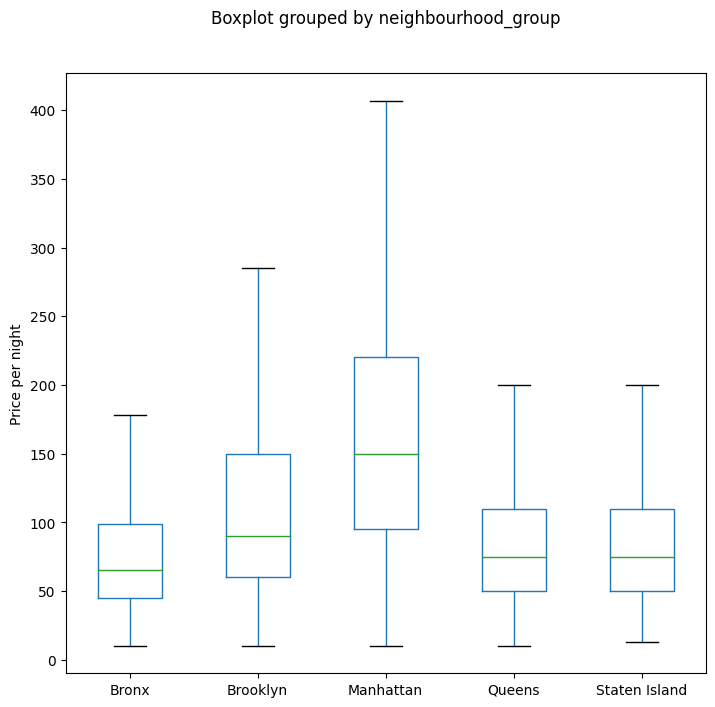

In [52]:
# Build boxplot to compare prices in different neighborhoods

neighbourhood_group_price = df.groupby('neighbourhood_group').price.mean()

ax5 = df.boxplot(column='price',by='neighbourhood_group', grid=False,showfliers=False, figsize=(8,8))
ax5.set_ylabel("Price per night")
ax5.set_xlabel(None)
ax5.set_title(None)

Text(0.5, 1.0, '')

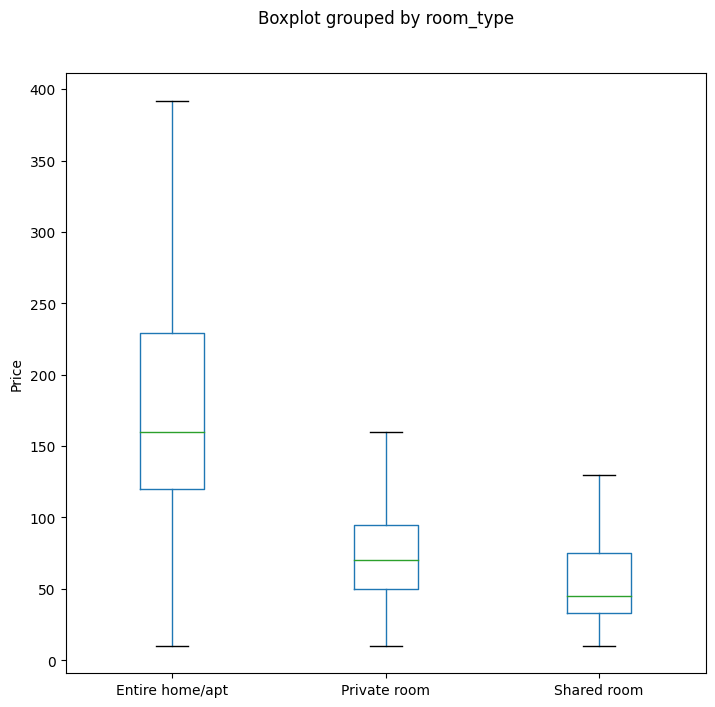

In [53]:
# Create boxplot grouped by

room_type_grouped_price = df.groupby('room_type').price.mean()

ax8 = df.boxplot(column='price',by='room_type', grid=False,showfliers=False, figsize=(8,8))
ax8.set_ylabel("Price")
ax8.set_xlabel(None)
ax8.set_title(None)

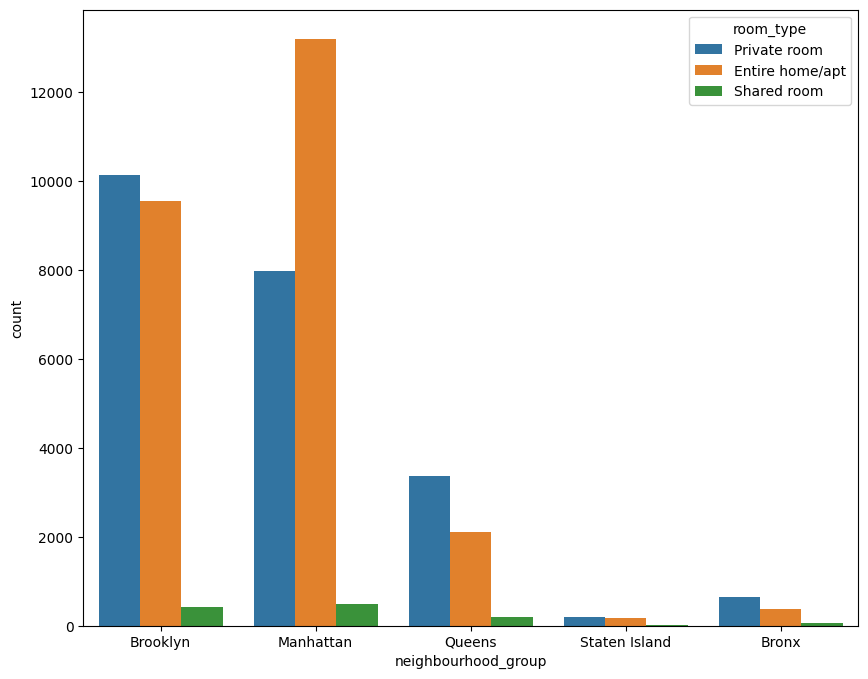

In [45]:
# Visualize how the neighborhood groups and room types relate

plt.figure(figsize=(10,8))
ax = sns.countplot(x=df['neighbourhood_group'],hue=df['room_type'])# here hue parameter will give us 3 diffrent colors
plt.show()

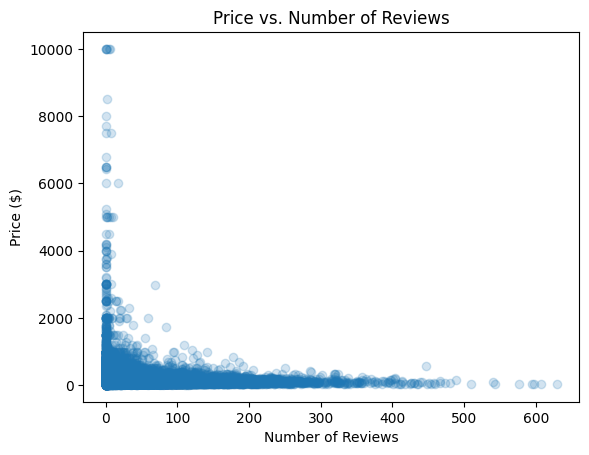

In [46]:
# Plotting differences between Borough and Room Type
# Select the columns of interest
df2 = df[["number_of_reviews", "price"]]

# Drop any rows with missing values
df2 = df2.dropna()

# Create a scatter plot of price vs. number of reviews
plt.scatter(df2["number_of_reviews"], df2["price"], alpha=0.2)

# Add labels and titles to the plot
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.title("Price vs. Number of Reviews")

# Show the plot
plt.show()